In [16]:
"""
Exercise 2: Training and Predictions
Neural Network Classification - Module 3

This exercise covers:
- Implementing the 5-step training loop
- Converting logits → probabilities → labels
- Using model.eval() and torch.inference_mode()
- Tracking training progress
- Calculating accuracy

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""


'\nExercise 2: Training and Predictions\nNeural Network Classification - Module 3\n\nThis exercise covers:\n- Implementing the 5-step training loop\n- Converting logits → probabilities → labels\n- Using model.eval() and torch.inference_mode()\n- Tracking training progress\n- Calculating accuracy\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [ ]:
# ============================================
# Part 1: Setup and Data Preparation
# ============================================

print("=" * 60)
print("Part 1: Setup and Data Preparation")
print("=" * 60)

# Create dataset
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


Part 1: Setup and Data Preparation
Using device: cpu
Training size: 800
Test size: 200


In [19]:

# ============================================
# Part 2: Define the Model
# ============================================

print("\n" + "=" * 60)
print("Part 2: Define the Model")
print("=" * 60)

# Define linear model
class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 8),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layer_stack(x)

model = CircleModelV0().to(device)
print(model)



Part 2: Define the Model
CircleModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [20]:

# ============================================
# Part 3: Loss Function and Optimizer
# ============================================

print("\n" + "=" * 60)
print("Part 3: Loss Function and Optimizer")
print("=" * 60)

# Loss function for binary classification
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: BCEWithLogitsLoss()")
print(f"Optimizer: Adam (lr=0.01)")



Part 3: Loss Function and Optimizer
Loss function: BCEWithLogitsLoss()
Optimizer: Adam (lr=0.01)


In [21]:

# ============================================
# Part 4: Training Loop (5 Steps)
# ============================================

print("\n" + "=" * 60)
print("Part 4: Training Loop")
print("=" * 60)

epochs = 100
train_losses = []
train_accuracies = []

model.train()
for epoch in range(epochs):
    # Step 1: Forward pass
    y_logits = model(X_train)

    # Step 2: Calculate loss
    loss = criterion(y_logits, y_train)

    # Step 3: Zero gradients
    optimizer.zero_grad()

    # Step 4: Backward pass
    loss.backward()

    # Step 5: Optimizer step
    optimizer.step()

    # Track metrics
    train_losses.append(loss.item())
    with torch.no_grad():
        y_pred = (torch.sigmoid(y_logits) > 0.5).long()
        accuracy = (y_pred == y_train).float().mean()
        train_accuracies.append(accuracy.item())

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

print("\nTraining complete!")



Part 4: Training Loop
Epoch [10/100], Loss: 0.6939, Acc: 64.25%
Epoch [20/100], Loss: 0.6931, Acc: 48.88%
Epoch [30/100], Loss: 0.6931, Acc: 52.13%
Epoch [40/100], Loss: 0.6929, Acc: 50.38%
Epoch [50/100], Loss: 0.6929, Acc: 51.38%
Epoch [60/100], Loss: 0.6929, Acc: 51.50%
Epoch [70/100], Loss: 0.6929, Acc: 51.13%
Epoch [80/100], Loss: 0.6929, Acc: 51.63%
Epoch [90/100], Loss: 0.6929, Acc: 51.38%
Epoch [100/100], Loss: 0.6929, Acc: 51.25%

Training complete!



Part 5: Visualizing Training Progress


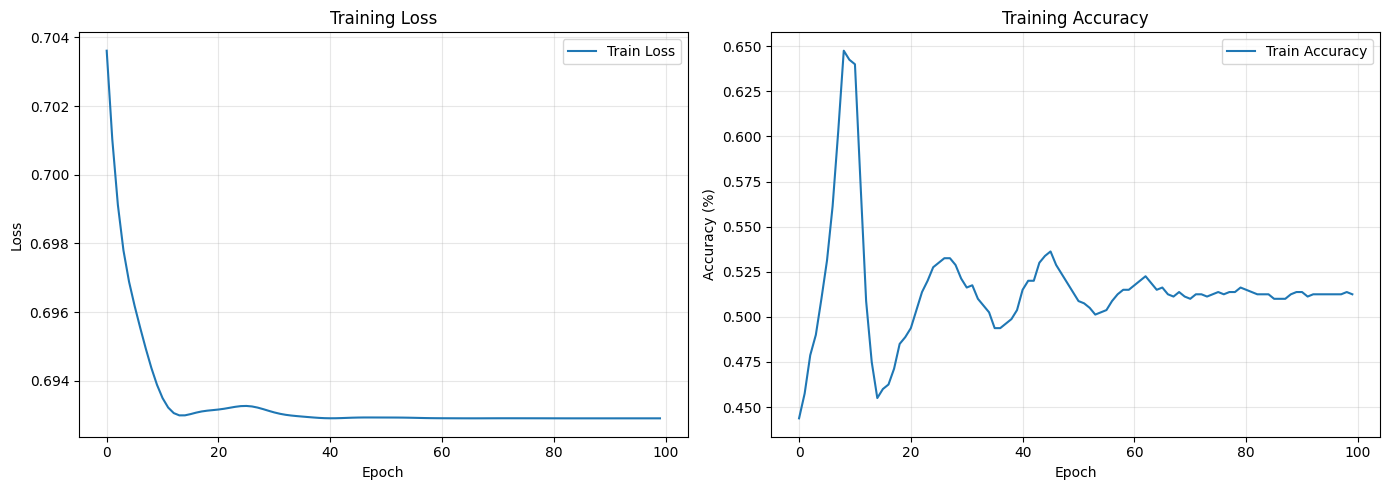

Training curves visualized!
Motto: Visualize, visualize, visualize!


In [22]:

# ============================================
# Part 5: Visualizing Training Progress
# ============================================

print("\n" + "=" * 60)
print("Part 5: Visualizing Training Progress")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(train_losses, label='Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy curve
axes[1].plot(train_accuracies, label='Train Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training curves visualized!")
print("Motto: Visualize, visualize, visualize!")


In [23]:

# ============================================
# Part 6: Inference Mode Predictions
# ============================================

print("\n" + "=" * 60)
print("Part 6: Inference Mode Predictions")
print("=" * 60)

# Set model to evaluation mode
model.eval()

# Make predictions using inference mode
with torch.inference_mode():
    # Forward pass (raw logits)
    test_logits = model(X_test)

    # Convert to probabilities
    test_probs = torch.sigmoid(test_logits)

    # Convert to labels
    test_preds = (test_probs > 0.5).long()

# Calculate test accuracy
test_accuracy = (test_preds == y_test).float().mean()
print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")

# Show some examples
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"  Sample {i+1}:")
    print(f"    Logits: {test_logits[i].item():.4f}")
    print(f"    Probability: {test_probs[i].item():.4f}")
    print(f"    Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")



Part 6: Inference Mode Predictions
Test Accuracy: 46.50%

First 5 predictions:
  Sample 1:
    Logits: 0.0257
    Probability: 0.5064
    Predicted: 1, Actual: 1.0
  Sample 2:
    Logits: 0.0713
    Probability: 0.5178
    Predicted: 1, Actual: 0.0
  Sample 3:
    Logits: -0.0242
    Probability: 0.4939
    Predicted: 0, Actual: 1.0
  Sample 4:
    Logits: 0.0640
    Probability: 0.5160
    Predicted: 1, Actual: 0.0
  Sample 5:
    Logits: -0.0286
    Probability: 0.4928
    Predicted: 0, Actual: 1.0


In [24]:

# ============================================
# Part 7: Understanding model.eval() and torch.inference_mode()
# ============================================

print("\n" + "=" * 60)
print("Part 7: Understanding Evaluation Mode")
print("=" * 60)

print("model.eval() vs model.train():")
print("  model.train() - Enables dropout and batch norm training behavior")
print("  model.eval()  - Disables dropout, uses running statistics")

print("\ntorch.inference_mode():")
print("  - Disables gradient calculation")
print("  - Faster than torch.no_grad()")
print("  - Use for making predictions")

print("\nCorrect inference pattern:")
print("  model.eval()")
print("  with torch.inference_mode():")
print("      predictions = model(X)")



Part 7: Understanding Evaluation Mode
model.eval() vs model.train():
  model.train() - Enables dropout and batch norm training behavior
  model.eval()  - Disables dropout, uses running statistics

torch.inference_mode():
  - Disables gradient calculation
  - Faster than torch.no_grad()
  - Use for making predictions

Correct inference pattern:
  model.eval()
  with torch.inference_mode():
      predictions = model(X)



Part 8: Visualizing Predictions


/var/folders/29/53gc99nx6v9cg7lwgmh0cmc80000gn/T/ipykernel_77859/4032896941.py:25: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_cpu[incorrect_mask, 0], X_test_cpu[incorrect_mask, 1],


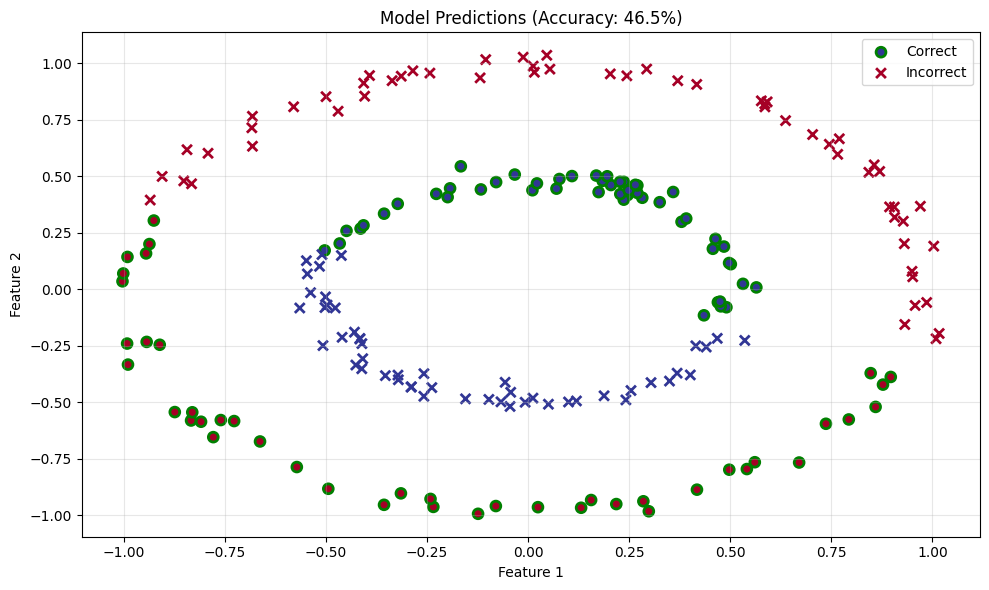

In [25]:

# ============================================
# Part 8: Predictions Visualization
# ============================================

print("\n" + "=" * 60)
print("Part 8: Visualizing Predictions")
print("=" * 60)

# Move data to CPU for plotting
X_test_cpu = X_test.cpu().numpy()
y_test_cpu = y_test.cpu().numpy().squeeze()
test_preds_cpu = test_preds.cpu().numpy().squeeze()

# Plot predictions
plt.figure(figsize=(10, 6))

# Correct predictions (green circles)
correct_mask = test_preds_cpu == y_test_cpu
plt.scatter(X_test_cpu[correct_mask, 0], X_test_cpu[correct_mask, 1],
            c=y_test_cpu[correct_mask], cmap='RdYlBu', s=50,
            marker='o', edgecolors='g', linewidths=2, label='Correct')

# Incorrect predictions (red X)
incorrect_mask = ~correct_mask
plt.scatter(X_test_cpu[incorrect_mask, 0], X_test_cpu[incorrect_mask, 1],
            c=y_test_cpu[incorrect_mask], cmap='RdYlBu', s=50,
            marker='x', edgecolors='r', linewidths=2, label='Incorrect')

plt.title(f'Model Predictions (Accuracy: {test_accuracy.item()*100:.1f}%)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:

# ============================================
# Exercises
# ============================================

print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)



Exercises


In [27]:

# Exercise 1: Try different thresholds
print("\nExercise 1: Try different thresholds")
print("Experiment with different decision thresholds:")
print("  - threshold=0.3 (more sensitive to class 1)")
print("  - threshold=0.5 (default)")
print("  - threshold=0.7 (less sensitive to class 1)")
print("Tip: Modify (test_probs > 0.5) to use different thresholds")

thresholds = [0.3, 0.5, 0.7]

for threshold in thresholds:
    model.eval()
    with torch.inference_mode():
        # Forward pass (raw logits)
        test_logits = model(X_test)

        # Convert to probabilities
        test_probs = torch.sigmoid(test_logits)

        # Convert to labels
        test_preds = (test_probs > threshold).long()

    # Calculate test accuracy
    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nTest Accuracy with threshold={threshold}: {test_accuracy.item()*100:.2f}%")



Exercise 1: Try different thresholds
Experiment with different decision thresholds:
  - threshold=0.3 (more sensitive to class 1)
  - threshold=0.5 (default)
  - threshold=0.7 (less sensitive to class 1)
Tip: Modify (test_probs > 0.5) to use different thresholds

Test Accuracy with threshold=0.3: 50.00%

Test Accuracy with threshold=0.5: 46.50%

Test Accuracy with threshold=0.7: 50.00%


In [39]:

# Exercise 2: Experiment with learning rate
print("\nExercise 2: Experiment with learning rate")
print("Try different learning rates:")
print("  - lr=0.001 (slower learning)")
print("  - lr=0.01 (default)")
print("  - lr=0.1 (faster learning, may be unstable)")
print("Tip: Modify the 'lr' parameter in optim.Adam()")

learning_rates = [0.001, 0.01, 0.1]
all_results = {}
for learning_rate in learning_rates:
    model = CircleModelV0().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), learning_rate)

    train_losses = []

    for epoch in range(100):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_probs = model(X_test)
        test_probs = torch.sigmoid(test_probs)
        test_preds = (test_probs > 0.5).long()
    
    all_results[learning_rate] = train_losses

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nLearning rate={learning_rate}")
    print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")
    print(f"Training losses: {train_losses[-1]}")





Exercise 2: Experiment with learning rate
Try different learning rates:
  - lr=0.001 (slower learning)
  - lr=0.01 (default)
  - lr=0.1 (faster learning, may be unstable)
Tip: Modify the 'lr' parameter in optim.Adam()

Learning rate=0.001
Test Accuracy: 70.50%
Training losses: 0.6772774457931519

Learning rate=0.01
Test Accuracy: 91.50%
Training losses: 0.43995925784111023

Learning rate=0.1
Test Accuracy: 100.00%
Training losses: 0.0023729654494673014


In [31]:

# Exercise 3: Track loss over epochs
print("\nExercise 3: Analyze training curves")
print("Questions to answer:")
print("  - Is the loss decreasing steadily?")
print(" Anwser: Yes at the beginning the loss usually decreases steadily, meaning the model is learning useful patterns. But after some epochs, the decrease becomes slower and may start to flatten.")
print("  - Is the training plateauing?")
print(" Anwser: Yes. If the loss curve becomes almost flat and accuracy stops improving, that means training is plateauing.")
print("  - Would more epochs help?")
print(" Anwser: More epochs won’t significantly help unless you use a better (nonlinear) model.")
print("Tip: Look at the loss and accuracy curves")



Exercise 3: Analyze training curves
Questions to answer:
  - Is the loss decreasing steadily?
 Anwser: Yes at the beginning the loss usually decreases steadily, meaning the model is learning useful patterns. But after some epochs, the decrease becomes slower and may start to flatten.
  - Is the training plateauing?
 Anwser: Yes. If the loss curve becomes almost flat and accuracy stops improving, that means training is plateauing.
  - Would more epochs help?
 Anwser: More epochs won’t significantly help unless you use a better (nonlinear) model.
Tip: Look at the loss and accuracy curves


In [43]:

# Exercise 4: Experiment with epochs
print("\nExercise 4: Experiment with epochs")
print("Try different numbers of epochs:")
print("  - epochs=50 (less training)")
print("  - epochs=100 (default)")
print("  - epochs=200 (more training)")
print("Tip: Modify the 'epochs' variable")

num_epochs = [50, 100, 200]

class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(), # add activation layer
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layer_stack(x)

for epochs in num_epochs:
    model = CircleModelV0().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), 0.01)

    train_losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_probs = model(X_test)
        test_probs = torch.sigmoid(test_probs)
        test_preds = (test_probs > 0.5).long()
    
    all_results[epochs] = train_losses

    test_accuracy = (test_preds == y_test).float().mean()
    print(f"\nNumber of epochs={epochs}")
    print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")
    print(f"Training losses: {train_losses[-1]}")


Exercise 4: Experiment with epochs
Try different numbers of epochs:
  - epochs=50 (less training)
  - epochs=100 (default)
  - epochs=200 (more training)
Tip: Modify the 'epochs' variable

Number of epochs=50
Test Accuracy: 89.50%
Training losses: 0.6161049008369446

Number of epochs=100
Test Accuracy: 100.00%
Training losses: 0.31905898451805115

Number of epochs=200
Test Accuracy: 97.50%
Training losses: 0.20895199477672577


In [ ]:

# Exercise 5: Compare model.eval() vs not using it
print("\nExercise 5: Understand model.eval()")
print("Question: What happens if you forget to call model.eval() before testing?")
print("Tip: Try commenting out model.eval() and see if results change")

model.train() # training mode if include dropout and batch normalization
with torch.no_grad():
    test_preds = model(X_test)
    test_preds = torch.sigmoid(test_preds)
    test_preds = (test_preds > 0.5).long()

test_accuracy = (test_preds == y_test).float().mean()
print(test_accuracy)

print("If you forget to call model.eval() before testing, your model stays in training mode, which can make your test results wrong or unstable.")


Exercise 5: Understand model.eval()
Question: What happens if you forget to call model.eval() before testing?
Tip: Try commenting out model.eval() and see if results change
tensor(0.9750)


In [ ]:

print("\n" + "=" * 60)
print("Exercise 2 Complete!")
print("Remember: If in doubt, run the code!")
print("Remember: Experiment, experiment, experiment!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)
